In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Open data file
df = pd.read_csv('2_Data for EDA_batch.csv')
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [3]:
X = df[['r_d_n-0', 'r_d_n-1', 'r_d_n-2', 'r_d_n-3', 'r_d_n-4', 'r_d_n-5', 'days_since_rain', 'month', 'season_int']]
y = df['target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [5]:
# naive benchmark
base_acc = y_train.value_counts(normalize=True)
base_acc

target
0    0.808482
1    0.191518
Name: proportion, dtype: float64

In [6]:
pd.DataFrame({
    "train": pd.Series(y_train).value_counts(),
    "test":  pd.Series(y_test).value_counts()
})

,train,test
target,,
0,2440,797
1,578,209


In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
predictions = model.predict(X_train)

In [9]:
model.score(X_train, y_train)

0.8442677269715043

In [10]:
model.score(X_test, y_test)

0.827037773359841

In [11]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_train_transformed = poly_features.fit_transform(X_train)
X_test_transformed = poly_features.fit_transform(X_test)

In [12]:
quadratic_model = LogisticRegression()
quadratic_model.fit(X_train_transformed, y_train)

LogisticRegression()

In [13]:
preds = quadratic_model.predict(X_train_transformed)

In [14]:
quadratic_model.score(X_train_transformed, y_train)

0.8416169648774022

In [15]:
quadratic_model.score(X_test_transformed, y_test)

0.8131212723658051

In [16]:
from sklearn.pipeline import make_pipeline

In [17]:
train_error = []
test_error = []

for i in range(1, 7):
    pipe = make_pipeline(PolynomialFeatures(degree=i), LogisticRegression())
    pipe.fit(X_train, y_train)
    train_predictions = pipe.predict(X_train)
    test_predictions = pipe.predict(X_test)
    train_error.append(pipe.score(X_train, y_train))
    test_error.append(pipe.score(X_test, y_test))
    print(f'Degree is {i}\nTrain Accuracy: {train_error[-1]: .4f}\nTest Accuracy: {test_error[-1]: .4f}\n---------------')

Degree is 1
Train Accuracy:  0.8443
Test Accuracy:  0.8270
---------------
Degree is 2
Train Accuracy:  0.8416
Test Accuracy:  0.8111
---------------
Degree is 3
Train Accuracy:  0.8472
Test Accuracy:  0.8091
---------------
Degree is 4
Train Accuracy:  0.8403
Test Accuracy:  0.8151
---------------
Degree is 5
Train Accuracy:  0.8373
Test Accuracy:  0.8181
---------------
Degree is 6
Train Accuracy:  0.8396
Test Accuracy:  0.8141
---------------


In [18]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

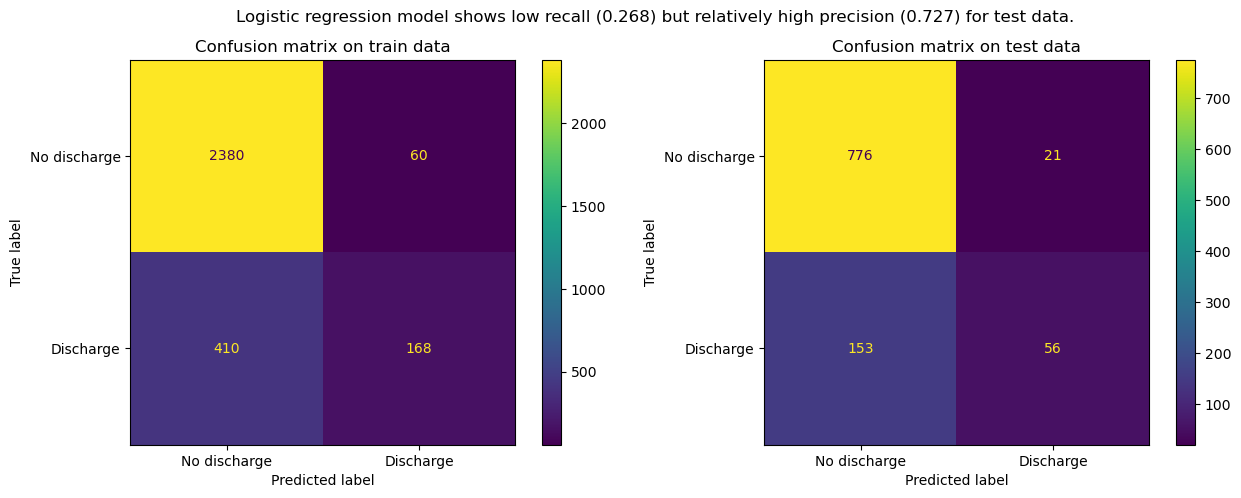

In [50]:
preds_train = model.predict(X_train)
cmat_train = confusion_matrix(y_train, preds_train)
train_disp = ConfusionMatrixDisplay(cmat_train, display_labels=['No discharge', 'Discharge'])

preds_test = model.predict(X_test)
cmat_test = confusion_matrix(y_test, preds_test)
test_disp = ConfusionMatrixDisplay(cmat_test, display_labels=['No discharge', 'Discharge'])

fig, ax = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('Logistic regression model shows low recall (0.268) but relatively high precision (0.727) for test data.')
train_disp.plot(ax = ax[0])
ax[0].set_title('Confusion matrix on train data')
test_disp.plot(ax = ax[1])
ax[1].set_title('Confusion matrix on test data');

In [20]:
tn, fp, fn, tp = cmat_test.ravel()
test_precision = tp / (tp + fp)
test_recall = tp / (tp + fn)
print(f'Test set precision: {test_precision: .3f}')
print(f'Test set recall: {test_recall: .3f}')

Test set precision:  0.727
Test set recall:  0.268
